In [27]:
import numpy as np
import random
import multiprocessing as mproc
import matplotlib.pyplot as plt
import tqdm
from tqdm.notebook import tqdm as tqdm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
import pandas as pd

import model_opt
import algo_GD
import helper

In [11]:
w_init = np.array([3,3])
_t_max = 3000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []
for i in tqdm(range(100)):
    var = np.random.randint(1,300,1)[0]
    noise = helper.gauss
    f = model_opt.RosenBrock(noise=noise,var=var)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        algo.update(model=f)
        
    iqr_store.append(helper.iqr(algo.noise_store))
    last_w_store.append(algo.w)

In [3]:
iqr_store

[365.01741556860236, 111.08618302588658, 324.05525577985316]

In [4]:
np.histogram(iqr_store)

(array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1]),
 array([111.08618303, 136.47930628, 161.87242953, 187.26555279,
        212.65867604, 238.0517993 , 263.44492255, 288.83804581,
        314.23116906, 339.62429231, 365.01741557]))

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([111.08618303, 113.62549535, 116.16480768, 118.70412   ,
        121.24343233, 123.78274465, 126.32205698, 128.8613693 ,
        131.40068163, 133.93999395, 136.47930628, 139.01861861,
        141.55793093, 144.09724326, 146.63655558, 149.17586791,
        151.71518023, 154.25449256, 156.79380488, 159.33311721,
        161.87242953, 164.41174186, 166.95105419, 169.49036651,
        172.02967884, 174.56899116, 177.10830349, 179.64761581,
        182.18692814, 184.72624046, 187.26555279, 189.80486511,
        192.34417744, 194.88348976, 19

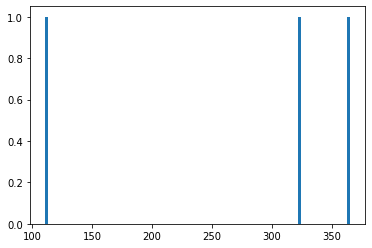

In [5]:
plt.hist(iqr_store,bins=100)

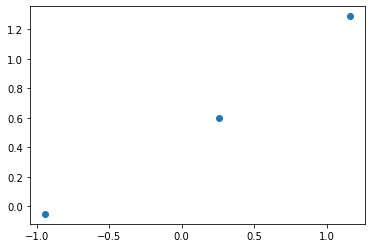

In [6]:
plt.scatter(*np.array(last_w_store).T)

In [7]:
s = np.where(np.array(iqr_store) < 50)

In [8]:
np.array(last_w_store)[s[0]]

array([], shape=(0, 2), dtype=float64)

In [10]:
helper.get_index_bins(np.array(iqr_store),300,0)

array([1])

In [12]:
np.max(iqr_store)-np.min(iqr_store) 

402.41776187672195

In [17]:
np.linspace(np.min(iqr_store),np.max(iqr_store),10)

array([  4.13147228,  48.84455693,  93.55764158, 138.27072624,
       182.98381089, 227.69689554, 272.40998019, 317.12306485,
       361.8361495 , 406.54923415])

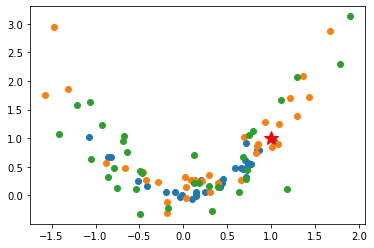

In [26]:
k = 4
fig, axes = plt.subplots(1,1, figsize=(6,6))
for i in range(k-1):
    c = np.linspace(np.min(iqr_store),np.max(iqr_store),k)
    index = helper.get_index_bins(np.array(iqr_store),c[i+1],c[i])
    plt.scatter(*np.array(last_w_store)[index].T)
plt.plot(*w_star, 'r*', markersize=14)

In [36]:
last_w_store = np.array(last_w_store)
last_w_store[0,:].shape

(2,)

In [45]:
import datetime
dt_now = datetime.datetime.now()

data = np.array([iqr_store,last_w_store[:,0],last_w_store[:,1]]).T
df = pd.DataFrame(data=data, columns=['iqr', 'w_0', 'w_1'])



In [39]:
df.to_csv('exp_result/gauss_noise_last_w  {}.csv'.format(dt_now),header=True)

,iqr,w_0,w_1
0,234.833361,0.300072,0.049386
1,54.923819,-0.854100,0.670801
2,83.343389,1.031557,0.950823
3,187.562024,-1.569977,1.748261
4,186.296513,-0.184366,-0.120980
...,...,...,...
95,284.271081,0.712341,0.279397
96,252.112137,0.029933,0.145854
97,399.987419,1.107400,1.674665
98,389.882810,1.781445,2.291669
